# **Image Classification**
the best blog on [CNN Architecture](https://learnopencv.com/understanding-convolutional-neural-networks-cnn/)

In [2]:
# Import libraries 
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
# check the tensorflow version 
print(tf.__version__)

2.12.0


In [4]:
# load the fashion mnist dataset 
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# Check the shape of the dataset 
print(fashion_mnist[0][0].shape) # [][] indexes for train and test 

# Seperating the training images from the test images and labels 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist

(60000, 28, 28)


In [5]:
# Shape of each dataset 
print("Train Images:", train_images.shape)
print("Train Labels:", train_labels.shape)
print("Test Images:", test_images.shape)
print("Test Labels:", test_labels.shape)

Train Images: (60000, 28, 28)
Train Labels: (60000,)
Test Images: (10000, 28, 28)
Test Labels: (10000,)


Observations:
there are 70,000 images.. 10,000 are test images and 60,000 train images 

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

- images are in matrix form whereas labels in array form 

Text(0.5, 0, '9')

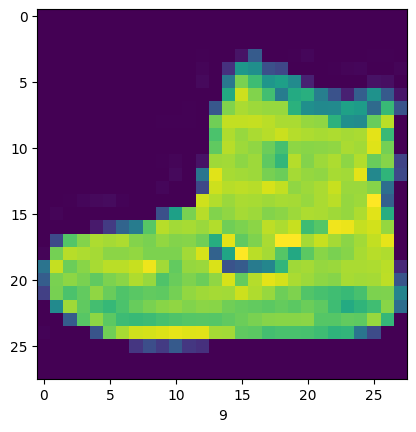

In [7]:
plt.imshow(train_images[0])
plt.xlabel(train_labels[0])

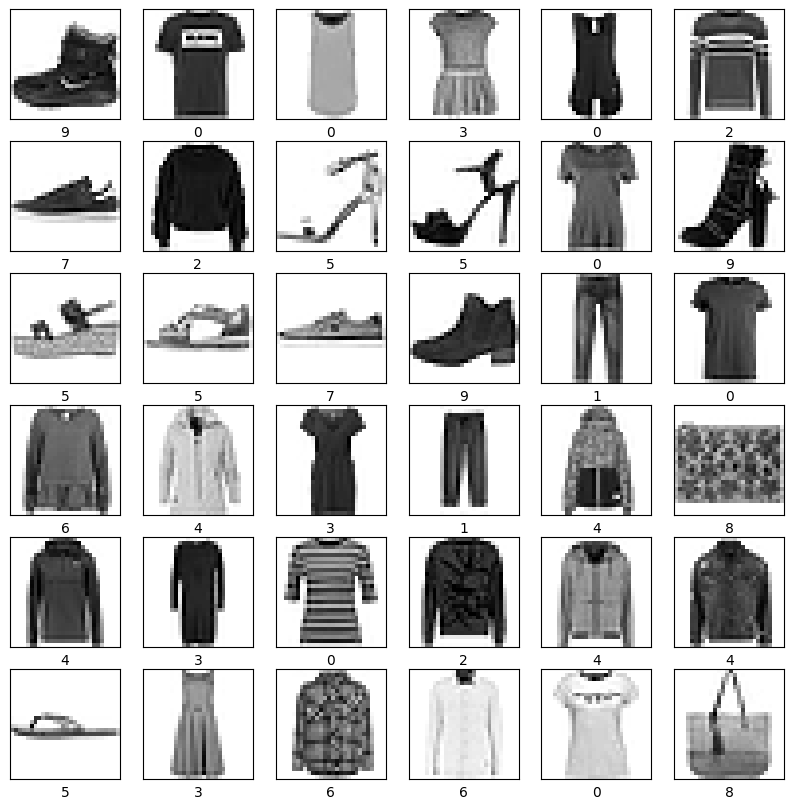

In [8]:
# Display the sample images 
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [9]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker',' Bag','Ankle boot']
class_names # class_names found from fashion mnist website

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 ' Bag',
 'Ankle boot']

0: T-shirt/top\
1: Trouser\
2: Pullover\
3: Dress\
4: Coat\
5: Sandal\
6: Shirt\
7: Sneaker\
8: Bag\
9: Ankle boot

In [10]:
len(train_images)

60000

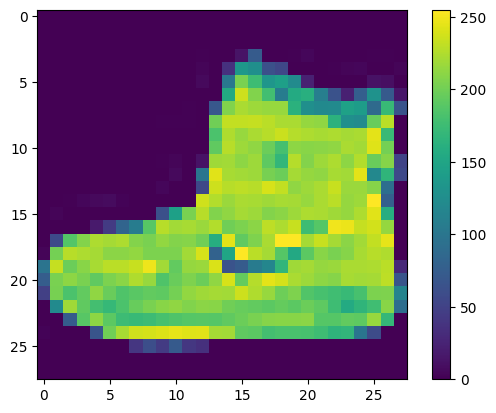

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
# Display the value of each pixel in the image 
print('Pixel values:')
for row in train_images[0]:
    for pixel in row:
        print('{:3}'.format(pixel), end=' ')
    print()

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3 
  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15 
  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66 
  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 21

In [13]:
# Normalize the data
train_images=train_images/255
test_images=test_images/255

# Convert into float 
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')

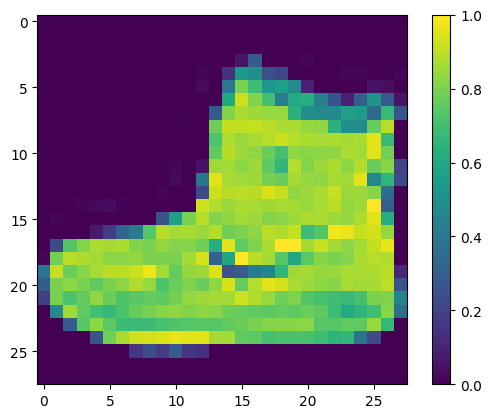

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
# Display the value of each pixel in the image 
print('Pixel values:')
for row in train_images[0]:
    for pixel in row:
        print('{:0.3}'.format(pixel), end=' ')
    print()

Pixel values:
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00392 0.0 0.0 0.051 0.286 0.0 0.0 0.00392 0.0157 0.0 0.0 0.0 0.0 0.00392 0.00392 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0118 0.0 0.141 0.533 0.498 0.243 0.212 0.0 0.0 0.0 0.00392 0.0118 0.0157 0.0 0.0 0.0118 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0235 0.0 0.4 0.8 0.69 0.525 0.565 0.482 0.0902 0.0 0.0 0.0 0.0 0.0471 0.0392 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.608 0.925 0.812 0.698 0.42 0.612 0.631 0.427 0.251 0.0902 0.302 0.51 0.282 0.0588 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00392 0.0 0.271 0.812 0.875 0.855 0.847 0.847 0.639 0

In [64]:
# Reshape the dimensions
train_images=train_images.reshape(60000, 28, 28, 1) # here 1 after 28, 28  because we have grey scale and 3 for RGB
test_images=test_images.reshape(10000, 28, 28, 1)

![CNN Architecture](cnn-architecture.png "Title")

In [70]:
# Create the model 
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)), # input layer 
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'), # Convolutional layer
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)), # pooling layer | converting max. dimension to smaller
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'), # Convolutional layer
    tf.keras.layers.MaxPooling2D(), # pooling layer
    tf.keras.layers.Flatten(), # flatten layer 
    tf.keras.layers.Dense(10, activation='softmax') # output layer 
])

# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 10)               

Filters actually scan the image, say one filter detect the eyes and other for other things

In [72]:
# Train the model 
model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3286 - accuracy: 0.8827 - val_loss: 0.3138 - val_accuracy: 0.8852
Epoch 2/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2921 - accuracy: 0.8943 - val_loss: 0.3083 - val_accuracy: 0.8865
Epoch 3/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2666 - accuracy: 0.9038 - val_loss: 0.2884 - val_accuracy: 0.8958
Epoch 4/5
1500/1500 [==============================] - 17s 12ms/step - loss: 0.2483 - accuracy: 0.9091 - val_loss: 0.2747 - val_accuracy: 0.9006
Epoch 5/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2299 - accuracy: 0.9159 - val_loss: 0.2667 - val_accuracy: 0.9046


In [73]:
# model evaluation 
test_loss, test_acc=model.evaluate(test_images, test_labels, verbose=1)
print('\n Test loss:', test_loss)
print('\n Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.2845 - accuracy: 0.8990

 Test loss: 0.2844749689102173

 Test accuracy: 0.8989999890327454


In [74]:
# Save the model 
model.save('fashion_mnist_model.h5')

In [76]:
# Make predictions 
test_images.shape

(10000, 28, 28, 1)

In [77]:
predictions=model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [82]:
test_labels[50]

4

In [78]:
predictions[0]

array([4.5792095e-07, 4.8903233e-09, 2.2109921e-08, 9.3684855e-09,
       7.6379720e-08, 1.7844493e-03, 3.3427725e-07, 6.8529387e-04,
       9.7337397e-06, 9.9751955e-01], dtype=float32)

In [81]:
np.argmax(predictions[50])

4

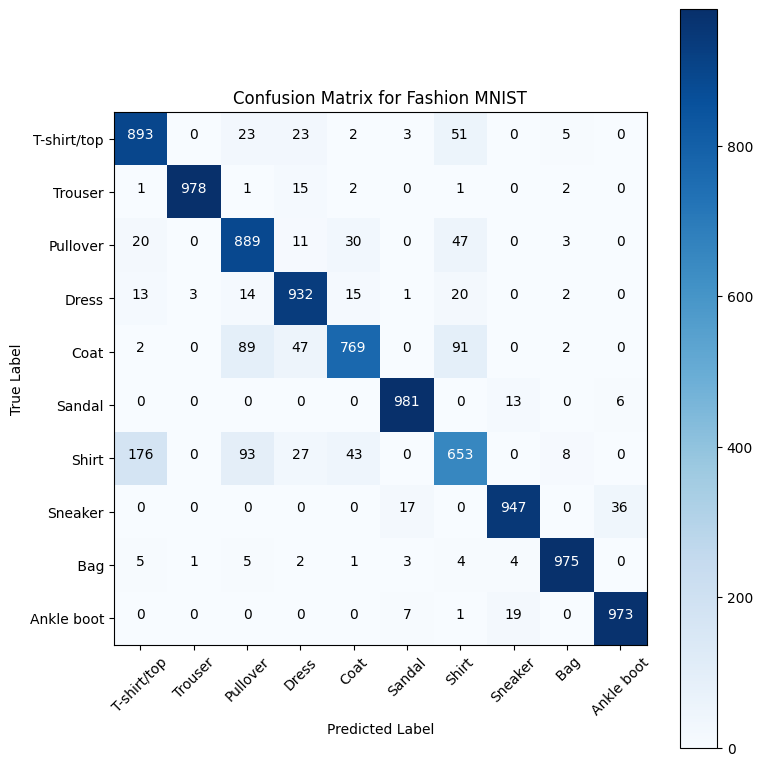

In [89]:
# draw a confusion matrix 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and obtained the predicted labels and true labels
# predicted_labels and true_labels are NumPy arrays containing the predicted and true labels repectively

# Convert continuous predictions to discrete class labels 
predicted_labels=np.argmax(predictions, axis=1)
# Create the confusion matrix
cm=confusion_matrix(test_labels, predicted_labels)

# Define the class labels for Fashion MNIST (assuming there are 10 classes)
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker',' Bag','Ankle boot']

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.title('Confusion Matrix for Fashion MNIST')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add values to confusion matrix plot 
thresh=cm.max()/2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()